In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import os
import sys
import pickle
import matplotlib

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import func_optimize as fo
from neurolib.utils import costFunctions as cost

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

not here


In [24]:
readpath = '..' + os.sep + '..' + os.sep

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
exc = load_array[0]
inh = load_array[1]

with open(readpath + os.sep + 'bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc_granular = load_array[0]
ext_inh_granular = load_array[1]

with open(readpath + os.sep + 'boundary_bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_exc_granular = load_array[0]
boundary_inh_granular = load_array[1]

grid_resolution = layout.grid_resolution
grid_resolution_granular = layout.grid_resolution_granular

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

facecolor_ = '#EAEAEA'
facecolor_ = 'white'

In [8]:
##### LOAD BOUNDARIES
with open(readpath + 'boundary_bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_bi_exc = load_array[0]
boundary_bi_inh = load_array[1]

with open(readpath + 'boundary_LC_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_LC_exc = load_array[0]
boundary_LC_inh = load_array[1]

with open(readpath + 'boundary_LCbi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_LC_up_exc = load_array[0]
boundary_LC_up_inh = load_array[1]

In [11]:
i_range = np.arange(0,83,1)
case = '1'
stateswitch_i = [0, 2, 5, 9, 13, 18, 24, 30, 36, 42, 48, 55, 62, 69, 76]

In [12]:
control_E = [None] * len(exc)
cost_E_final_mean = np.zeros(( len(exc) ))

file_E = 'task1_data' + os.sep + 'E.pickle'
if os.path.isfile(file_E) :
    print("file found")
    
    with open(file_E,'rb') as f:
        load_array = pickle.load(f)

    control_ = load_array[0]
    cost_ = load_array[1]
    
for i in i_range:
    if i in stateswitch_i:
        continue
    if type(control_[i]) == type(None):
        continue
    control_E[i] = control_[i].copy()
    cost_E_final_mean[i] = cost_[i]
        
control_I = [None] * len(exc)
cost_I_final_mean = np.zeros(( len(exc) ))

file_I = 'task1_data' + os.sep + 'I.pickle'
if os.path.isfile(file_I) :
    print("file found")
    
    with open(file_I,'rb') as f:
        load_array = pickle.load(f)

    control_ = load_array[0]
    cost_ = load_array[1]
    
for i in i_range:
    if i in stateswitch_i:
        continue
    if type(control_[i]) == type(None):
        continue
    control_I[i] = control_[i].copy()
    cost_I_final_mean[i] = cost_[i]
        
read_file = '..' + os.sep + '..' + os.sep + 'data_final_2' + os.sep + 'control_' + case + '.pickle'
if os.path.isfile(read_file) :
    print("file found")
    
    with open(read_file,'rb') as f:
        load_array = pickle.load(f)

    bestControl = load_array[0]
    
init_control_noisefree = [None] * len(exc)
for i in i_range:
    init_control_noisefree[i] = bestControl[i].copy()

factor = np.ones(( len(exc) ))
t_array = np.zeros(( len(exc) )) 
file_factor = 'factor_task1.pickle'
cost_nf_final_mean = np.zeros(( len(exc) ))

if os.path.isfile(file_factor) :
    print("file found")
    
    with open(file_factor,'rb') as f:
        load_array = pickle.load(f)
        
    fac = load_array[0]
    t_arr = load_array[1]
    cnf = load_array[2]

for i in i_range:
    factor[i] = fac[i]
    t_array[i] = t_arr[i]
    cost_nf_final_mean[i] = cnf[i]

file found
file found
file found
file found


In [47]:
d_e = np.zeros(( len(exc) ))
d_i = np.zeros(( len(exc) ))
d_tot = np.zeros(( len(exc) ))
a_eE = np.zeros(( len(exc) ))
a_iE = np.zeros(( len(exc) ))
a_eI = np.zeros(( len(exc) ))
a_iI = np.zeros(( len(exc) ))
a_eNF = np.zeros(( len(exc) ))
a_iNF = np.zeros(( len(exc) ))

for i in i_range:
        
    d_e[i] = data.dist_right(exc[i], inh[i], ext_exc_granular, ext_inh_granular, grid_resolution_granular)
    d_i[i] = data.dist_low(exc[i], inh[i], ext_exc_granular, ext_inh_granular, grid_resolution_granular)
    d_tot[i] = data.dist_up_regime(exc[i], inh[i], boundary_exc_granular, boundary_inh_granular, grid_resolution_granular)
    
    if type(control_E[i]) != type(None):
        a_eE[i] = np.amax(np.abs(control_E[i][0,0,:]))
        a_iE[i] = np.amax(np.abs(control_E[i][0,1,:]))
    if type(control_I[i]) != type(None):
        a_eI[i] = np.amax(np.abs(control_I[i][0,0,:]))
        a_iI[i] = np.amax(np.abs(control_I[i][0,1,:]))
    if factor[i] > 1.:
        a_eNF[i] = factor[i] * np.amax(np.abs(init_control_noisefree[i][0,0,:]))
        a_iNF[i] = factor[i] * np.amax(np.abs(init_control_noisefree[i][0,1,:]))

1 1.4300000000000002 23.232271760927933 5.995064959423378 9.023177918530253
3 2.8899999999999997 6.170970605317029 6.082555990582448 10.319018530379717
4 1.92 28.82011760460906 4.929792852598753 14.011002427280426
25 1.41 10.609489516931658 10.66273084659646 10.50933473853659


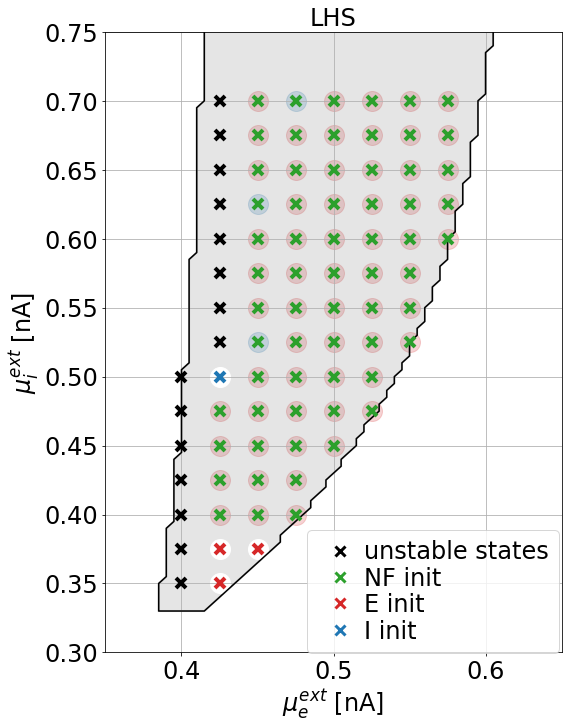

In [58]:
fig1, ax = plt.subplots(figsize = (8,10), facecolor=facecolor_)
ax.set_ylim(0.3, .75)
ax.set_xlim(0.35, .65)

fontsize_ = 24
fontsize_small = 20
markersize_ = 10

marker_ = 'x'
stateswitch_i = [0, 2, 5, 9, 13, 18, 24, 30, 36, 42, 48, 55, 62, 69, 76]

vertices = np.zeros(( len(boundary_bi_exc), 2 ))
for i in range(vertices.shape[0]):
    vertices[i,0] = boundary_bi_exc[i]
    vertices[i,1] = boundary_bi_inh[i]
path = mpath.Path(vertices)

x, y = zip(*path.vertices)
line, = ax.plot(x, y, markersize=0, color='black')

patch = patches.PathPatch(path, facecolor='grey', alpha=0.2, lw=2)
ax.add_patch(patch)


for i in [1,3,4,25]:
    x_ = exc[i]
    y_ = inh[i]
    ax.plot(x_, y_, 'o', color='white', markersize=20, zorder=1)
    

for i in i_range:
    if i in stateswitch_i:
        ax.plot(exc[i], inh[i], marker_, color='black', markersize=markersize_, markeredgewidth=4)
        continue
        
    #print(i, cost_nf_final_mean[i], cost_E_final_mean[i], cost_I_final_mean[i])
        
    if cost_nf_final_mean[i] > 0. and cost_nf_final_mean[i] < cost_E_final_mean[i] and cost_nf_final_mean[i] < cost_I_final_mean[i]:
        ax.plot(exc[i], inh[i], marker_, color=green, markersize=markersize_, markeredgewidth=4)
        if cost_I_final_mean[i] < cost_E_final_mean[i]:
            x_ = exc[i]
            y_ = inh[i]
            ax.plot(x_, y_, 'o', color=inh_blue, markersize=20, alpha=0.2, zorder=-1)
        elif cost_I_final_mean[i] > cost_E_final_mean[i]:
            x_ = exc[i]
            y_ = inh[i]
            ax.plot(x_, y_, 'o', color=exc_red, markersize=20, alpha=0.2, zorder=-1)
    elif cost_E_final_mean[i] > 0. and cost_E_final_mean[i] < cost_nf_final_mean[i] and cost_E_final_mean[i] < cost_I_final_mean[i]:
        print(i, factor[i], cost_nf_final_mean[i], cost_E_final_mean[i], cost_I_final_mean[i])
        ax.plot(exc[i], inh[i], marker_, color=exc_red, markersize=markersize_, markeredgewidth=4)
    elif cost_I_final_mean[i] > 0. and cost_I_final_mean[i] < cost_nf_final_mean[i] and cost_I_final_mean[i] < cost_E_final_mean[i]:
        print(i, factor[i], cost_nf_final_mean[i], cost_E_final_mean[i], cost_I_final_mean[i])
        ax.plot(exc[i], inh[i], marker_, color=inh_blue, markersize=markersize_, markeredgewidth=4)

legend_elements = [
    Line2D([], [], color='black', marker=marker_, linestyle='None', markersize=10,
        markeredgewidth=3, label=r'unstable states'),
    Line2D([], [], color=green, marker=marker_, linestyle='None', markersize=10,
        markeredgewidth=3, label=r'NF init'),
    Line2D([], [], color=exc_red, marker=marker_, linestyle='None', markersize=10,
        markeredgewidth=3, label=r'E init'),
    Line2D([], [], color=inh_blue, marker=marker_, linestyle='None', markersize=10,
        markeredgewidth=3, label=r'I init'),
                      ]


ax.legend(handles=legend_elements, fontsize=fontsize_, loc='lower right', bbox_to_anchor=(1.02, -0.02), ncol = 1, handletextpad=0., columnspacing=1., labelspacing=0.1)
ax.get_legend().get_title().set_fontsize(fontsize_)
    
ax.set_xlabel(r'$\mu_e^{ext}$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mu_i^{ext}$ [nA]', fontsize=fontsize_)
ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

fig1.tight_layout()
ax.set_title('LHS', fontsize=fontsize_)
        
plt.savefig('statespace.jpg', bbox_inches='tight', facecolor=fig1.get_facecolor(),
            edgecolor='none', dpi=300 )

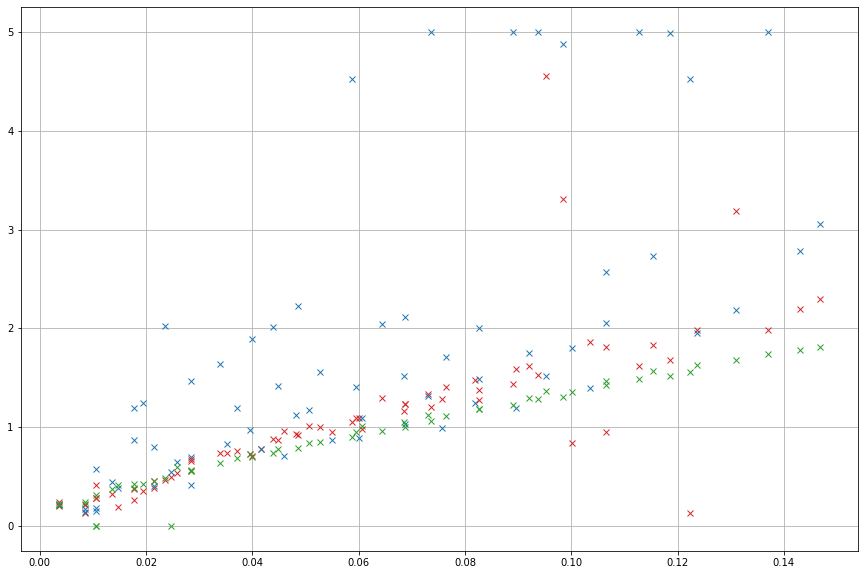

In [49]:
fig, ax = plt.subplots(figsize = (15,10), facecolor=facecolor_)


for i in i_range:
    if a_eE[i] != 0.:
        ax.plot(d_tot[i], a_eE[i], linestyle='None', marker='x', color=exc_red)
    if a_iI[i] != 0.:
        plt.plot(d_tot[i], a_iI[i], linestyle='None', marker='x', color=inh_blue)
    if a_eNF[i] != 0.:
        ax.plot(d_tot[i], a_eNF[i], linestyle='None', marker='x', color=green)
    
plt.show()

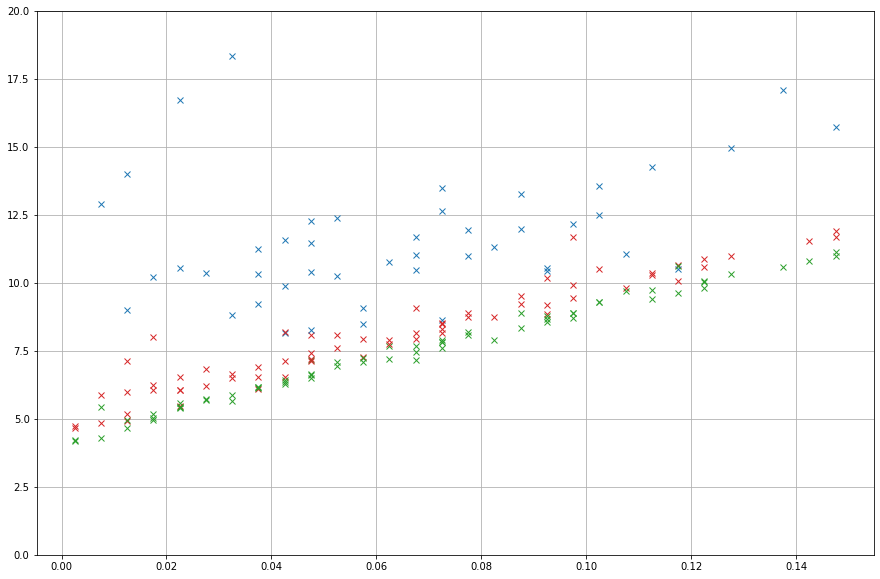

In [18]:
fig, ax = plt.subplots(figsize = (15,10), facecolor=facecolor_)


for i in i_range:
    if cost_E_final_mean[i] != 0.:
        ax.plot(d_e[i], cost_E_final_mean[i], linestyle='None', marker='x', color=exc_red)
    if cost_I_final_mean[i] != 0.:
        ax.plot(d_e[i], cost_I_final_mean[i], linestyle='None', marker='x', color=inh_blue)
    if cost_nf_final_mean[i] != 0.:
        ax.plot(d_e[i], cost_nf_final_mean[i], linestyle='None', marker='x', color=green)
    

plt.ylim(0,20)
plt.show()

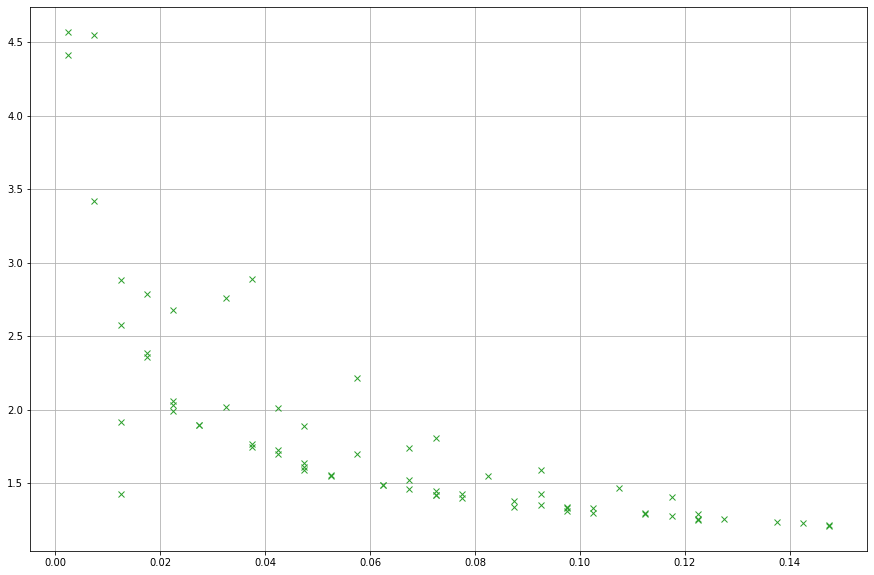

In [59]:
fig, ax = plt.subplots(figsize = (15,10), facecolor=facecolor_)


for i in i_range:
    if cost_nf_final_mean[i] != 0.:
        ax.plot(d_e[i], factor[i], linestyle='None', marker='x', color=green)
    

#plt.ylim(0,20)
plt.show()